# Exploratory data analysis
Introduction to exploratory data analysis (EDA).

EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task [(source 1)](https://chartio.com/learn/data-analytics/what-is-exploratory-data-analysis/). It is used to explore the data, find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques, and possibly formulate hypotheses that could lead to new data collection and experiments [(source 2)](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/). More specifically, EDA enables analysts to:
1. get maximum insights from a data set
2. uncover underlying structure
3. extract important variables from the dataset
4. detect outliers and anomalies (if any)
5. test underlying assumptions
6. determine the optimal factor settings

## EDA steps and tools
Practical steps in conducting EDA and frequently used EDA tools.
Based on *pandas2020-main.Sales_Analysis_Pandas_P3_tutorial.ipynb* and *pandas2020-main.TED_Talks_Pandas_P3_tutorial.ipynb*.


Based on [this](https://stackoverflow.com/a/22149930/1899061), in all computations, `axis=...` refers to the axis **along which** the computation is done. By default, `axis=0`. This is consistent with the `numpy.mean` usage when axis is specified explicitly (in `numpy.mean`, `axis==None` by default, which computes the mean value over the flattened array), in which `axis=0` along the rows (namely, index in pandas), and `axis=1` along the columns.
Note also that that `axis=0` indicates aggregating along rows and `axis=1` indicates aggregating along columns. This is consistent with how we index into a dataframe. In `df.iloc[<row>, <column>]`, `<row>` is in index position 0 and `<column>` is in index position 1. For added clarity, one may choose to specify `axis='index'` (instead of `axis=0`) or `axis='columns'` (instead of `axis=1`).
**But**, `axis=0` means each row as a bulk - we manipulate a `pd.DataFrame` inter-row, instead of within-row. Likewise, 1 means each column as a bulk, i.e. we manipulate a `pd.DataFrame` inter-column instead of within-column. For example, `<pd.df>.drop("A", axis=1)` will drop a whole column.

### Reading the dataset
`read_csv()`

### Initial examination and adaptations
`shape`, `head()`, `tail()`, `sample()`, `dtypes`, `info()`
`columns`, `columns.values`, `columns.values.tolist()`, `<pd.df>.values`
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
`ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

### Missing values and value counts
`isna()` (`isnull()`), `isna().sum()` (`isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isnull(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`value_counts()`, `value_counts(normalize=True)`, `dropna(how='all'/'any', inplace=True)`

### Examining individual data items, rows and columns
`sample()`
Simple indexing and fancy indexing: `iloc()`, `loc()`
`index`, `index[<from>:<to>]`, `reset_index(drop=True, inplace=True)`
Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of <column_name> from the <pd.df> stats computed by describe())
Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)

### Data transformations
`describe()`
`pd.to_numeric(<pd.DataFrame object>['<column name>'], errors='coerce')`, `pd.DataFrame.to_numpy()`, `pd.Series.to_numpy()`, `pd.to_datetime()`, ...
`<pd.df>.<column>.apply(<f_name>)` (apply the <f_name> function to all elements of each element of the `<column>`; for example, each element of the `<column>` can be a list of other elements)


### Exploring correlations
Explore correlations between the (numerical) columns.
`sb.heatmap()`
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Grouping and sorting data
`nunique()`
`groupby()`
`sort_values(by='<column name>', ascending=False/True)`
`sort_index(inplace=True)`
`agg(['<column_1 name>', '<column_2 name>', ...])`


### Data visualization
Plot some bargraphs, scatterplots, boxplots,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

### Other
[Other interesting ideas and different ways of using the things from above](https://realpython.com/pandas-python-explore-dataset/#exploring-your-dataset) (see the rest from [that article](https://realpython.com/pandas-python-explore-dataset/) as well).

## Import and configure packages
The `%run` magic does not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb* (the last line is added subsequently):

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%config IPCompleter.greedy=True

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import seaborn as sb

from plotnine import ggplot, aes, geom_line, geom_histogram, theme_xkcd

In [1]:
# %run "import_packages.ipynb"

## Introducing The Beatles dataset

### Read The Beatles songs *csv* file
`pd.read_csv()` returns a `pd.DataFrame` object.

In [3]:
# Get the songs as a pd.DataFrame object
songs = pd.read_csv('data/The Beatles songs dataset, v1, no NAs.csv')

### Explore the dataset (first steps)

##### Initial examination and adaptations
`shape`, `head()`, `tail()`, `sample()`, `dtypes`, `info()`
`columns`, `columns.values`, `columns.values.tolist()`, `<pd.df>.values`
`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)
`ast.literal_eval()` (using Python's *ast* module to transform a string into a literal value, a list, a tuple or any other container object)

`shape`, `head()`, `tail()`, `sample()`, `dtypes`, **<u>`info()`</u>**

In [4]:
# print(songs.shape)
# # print(songs.head())                         # the output is not table-like
# display(songs.head())
# display(songs.sample(4))
# display(songs.dtypes)
display(songs.info())
display(songs.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             310 non-null    object
 1   Year              310 non-null    int64 
 2   Album.debut       288 non-null    object
 3   Duration          310 non-null    int64 
 4   Other.releases    310 non-null    int64 
 5   Genre             306 non-null    object
 6   Songwriter        310 non-null    object
 7   Lead.vocal        302 non-null    object
 8   Top.50.Billboard  310 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 21.9+ KB


None

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
212,Revolution 9,1968,The Beatles,502,7,"Avant-Garde, Musique Concrete, Experimental, S...","Lennon, with Ono and Harrison",NaN,-1
116,I Should Have Known Better,1964,UK: A Hard Day's Night US: Hey Jude,164,18,Pop/Rock,Lennon,Lennon,-1
23,Bad Boy,1965,UK: A Collection of Beatles Oldies US: Beatles VI,150,0,R&B,Williams,Lennon,-1
241,Sun King,1969,Abbey Road,146,6,"Art Pop, Pop/Rock",Lennon,Lennon,-1
196,Oh! Darling,1969,Abbey Road,206,9,"Swamp Pop, Hard Rock, Pop/Rock",McCartney,McCartney,-1


`columns`, `columns.values`, `columns.values.tolist()`, `<pd.df>.values`

Show the columns of the `songs` object (which is a `pd.DataFrame` object).

In [5]:
# Get the columns as a pd.Index object
display(songs.columns)
# Get the columns as a list
display(list(songs.columns))
# Get the columns as a numpy.ndarray object
display(songs.columns.values)
display(type(songs.columns.values))
# Get the columns as a list
display(songs.columns.values.tolist())
# Get the values of all items in the dataset as a numpy.ndarray of lists of the values in each item
display(songs.values)
display(type(songs.values))

Index(['Title', 'Year', 'Album.debut', 'Duration', 'Other.releases', 'Genre',
       'Songwriter', 'Lead.vocal', 'Top.50.Billboard'],
      dtype='object')

['Title',
 'Year',
 'Album.debut',
 'Duration',
 'Other.releases',
 'Genre',
 'Songwriter',
 'Lead.vocal',
 'Top.50.Billboard']

array(['Title', 'Year', 'Album.debut', 'Duration', 'Other.releases',
       'Genre', 'Songwriter', 'Lead.vocal', 'Top.50.Billboard'],
      dtype=object)

numpy.ndarray

['Title',
 'Year',
 'Album.debut',
 'Duration',
 'Other.releases',
 'Genre',
 'Songwriter',
 'Lead.vocal',
 'Top.50.Billboard']

array([['12-Bar Original', 1965, 'Anthology 2', ...,
        'Lennon, McCartney, Harrison and Starkey', nan, -1],
       ['A Day in the Life', 1967,
        "Sgt. Pepper's Lonely Hearts Club Band", ...,
        'Lennon and McCartney', 'Lennon and McCartney', -1],
       ["A Hard Day's Night", 1964,
        "UK: A Hard Day's Night US: 1962-1966", ..., 'Lennon',
        'Lennon, with McCartney', 8],
       ...,
       ["You've Really Got a Hold on Me", 1963,
        'UK: With the Beatles US: The Beatles Second Album', ...,
        'Robinson', 'Lennon and Harrison', -1],
       ['Young Blood', 1963, 'Live at the BBC', ..., 'Leiber, Stoller',
        'Harrison', -1],
       ['Your Mother Should Know', 1967, 'Magical Mystery Tour', ...,
        'McCartney', 'McCartney', -1]], dtype=object)

numpy.ndarray

`<pd.df>.rename({'<column_1 old name>':'<column_1 new name>', '<column_2 old name>':'<column_2 new name>', ...}, axis='columns')`, `<pd.df>.columns = ['<column_1 name>', '<column_2 name>', ...]` (change the names of all columns in <pd.df>)

In [6]:
# Rename the Duration column to Length
songs.rename({'Duration': 'Length'}, axis='columns', inplace=True)
display(songs)
# Rename the Length column back to Duration
songs.rename({'Length': 'Duration'}, axis='columns', inplace=True)
display(songs)

,Title,Year,Album.debut,Length,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


##### Missing values and value counts
`isna()` (`isnull()`), `isna().sum()` (`isnull().sum`) ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`sb.heatmap()`, e.g. `sb.heatmap(<pd.df>.isnull(),cbar=False,cmap='viridis')` ([example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/))
`value_counts()`, `value_counts(normalize=True)`, `dropna(how='all'/'any', inplace=True)`

The `cmap` parameter denotes a [Matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html#classes-of-colormaps) (`viridis`, `cividis`, `tab20`, `winter`, `BuPu_r`, `ocean`,...).

<AxesSubplot:>

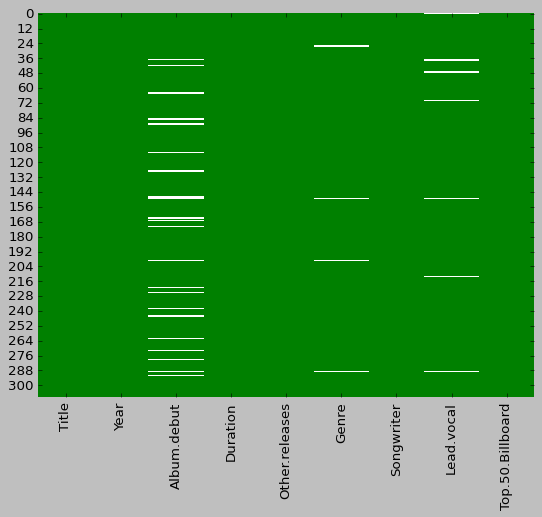

In [7]:
display(sb.heatmap(songs.isnull(), cbar=False, cmap='ocean'))

`index`, `index[<from>:<to>]`, `reset_index(drop=True, inplace=True)`

How many missing values are there?

In [8]:
# songs.isna().sum()
display(songs.isna().sum())
# display(songs.isnull().sum())         # isnull() is the same as isna(), and isna() is used more often

Title                0
Year                 0
Album.debut         22
Duration             0
Other.releases       0
Genre                4
Songwriter           0
Lead.vocal           8
Top.50.Billboard     0
dtype: int64

##### Examining individual data items, rows and columns
`sample()`
Simple indexing and fancy indexing: `iloc()`, `loc()`
`index`, `index[<from>:<to>]`, `reset_index(drop=True, inplace=True)`
Indexing in data stats: `<pd.df>.describe().loc['50%', '<column_name>']` (select the median of <column_name> from the <pd.df> stats computed by describe())
Indexing using list of values: `<pd.df>.loc[<pd.df>.<column>.isin(<list of values>)]` (select those observations where the value of <column> is in the `<list of values>`)

What are the songs with missing `Album.debut`?

In [9]:
display(len(songs.loc[songs['Album.debut'].isna()]))
display(songs['Album.debut'].isna())
print()

display(songs.loc[songs['Album.debut'].isna()])
display(songs.loc[songs['Album.debut'].isna()].index)
# display(songs.loc[songs['Album.debut'].isna()].index.tolist())
i = songs.loc[songs['Album.debut'].isna()].index
# display(i)

# display(songs.loc[songs['Album.debut'].isna(), 'Title':'Album.debut'])
display(songs.loc[songs['Album.debut'].isna(), ['Title', 'Album.debut']])
# display(songs.iloc[0:3, 2])
display(songs.iloc[i, 2])

22

0      False
1      False
2      False
3      False
4      False
       ...  
305    False
306    False
307    False
308    False
309    False
Name: Album.debut, Length: 310, dtype: bool

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
37,Catswalk,1962,NaN,150,0,Pop/Rock,McCartney,NaN,-1
42,Circles,1968,NaN,226,0,"Hindustani Blues, Pop/Rock",Harrison,Harrison,-1
64,Etcetera,1968,NaN,150,0,Pop/Rock,McCartney,McCartney,-1
85,Goodbye,1969,NaN,150,0,"Children's, Pop/Rock",McCartney,McCartney,-1
89,Heather,1968,NaN,130,0,"Rock, Pop/Rock",McCartney,McCartney,-1
112,I Lost My Little Girl,1962,NaN,105,0,"Rock, R&B, Pop/Rock",McCartney,Lennon,-1
127,I'll Keep You Satisfied,1963,NaN,150,0,Pop/Rock,"McCartney, with Lennon",Lennon and/or McCartney,-1
148,Jazz Piano Song,1969,NaN,150,0,Boogie-Woogie,"McCartney, Starkey",McCartney,-1
149,Jessie's Dream,1967,NaN,150,0,NaN,"Lennon, McCartney, Harrison, Starkey",NaN,-1
165,Looking Glass,1962,NaN,150,0,Pop/Rock,McCartney,McCartney,-1


Int64Index([ 37,  42,  64,  85,  89, 112, 127, 148, 149, 165, 167, 172, 199,
            221, 225, 238, 244, 262, 272, 279, 289, 292],
           dtype='int64')

,Title,Album.debut
37,Catswalk,NaN
42,Circles,NaN
64,Etcetera,NaN
85,Goodbye,NaN
89,Heather,NaN
112,I Lost My Little Girl,NaN
127,I'll Keep You Satisfied,NaN
148,Jazz Piano Song,NaN
149,Jessie's Dream,NaN
165,Looking Glass,NaN


37     NaN
42     NaN
64     NaN
85     NaN
89     NaN
112    NaN
127    NaN
148    NaN
149    NaN
165    NaN
167    NaN
172    NaN
199    NaN
221    NaN
225    NaN
238    NaN
244    NaN
262    NaN
272    NaN
279    NaN
289    NaN
292    NaN
Name: Album.debut, dtype: object

Replace `NaN` values in `Album.debut` with 'No' (these songs have not appeared on any of the official albums).

In [10]:
songs.iloc[i, 2] = 'No'
display(songs.iloc[i, [0, 2]])

,Title,Album.debut
37,Catswalk,No
42,Circles,No
64,Etcetera,No
85,Goodbye,No
89,Heather,No
112,I Lost My Little Girl,No
127,I'll Keep You Satisfied,No
148,Jazz Piano Song,No
149,Jessie's Dream,No
165,Looking Glass,No


Double-check the missing values now:

Title               0
Year                0
Album.debut         0
Duration            0
Other.releases      0
Genre               4
Songwriter          0
Lead.vocal          8
Top.50.Billboard    0
dtype: int64

<AxesSubplot:>

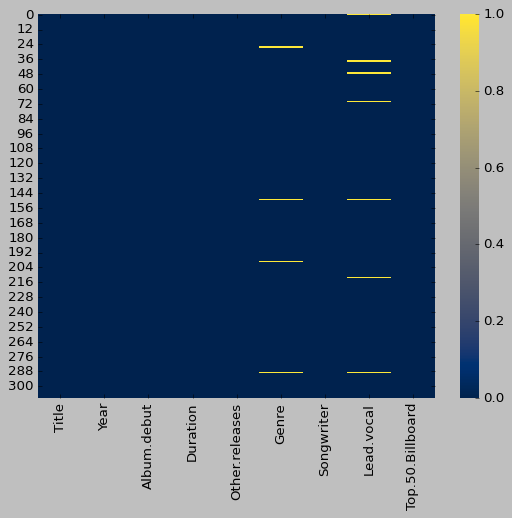

In [11]:
display(songs.isna().sum())
display(sb.heatmap(songs.isna(), cmap='cividis'))

How many songs from The Beatles early years are there?

In [29]:
early_years = [year for year in range(1957, 1962)]
# display(songs.loc[songs['Year'].isin(early_years)])
display(songs.loc[songs.Year.isin(early_years)])
display(len(songs.loc[songs.Year.isin(early_years)]))

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
7,Ain't She Sweet,1961,Anthology 1,150,9,Pop/Rock,"Yellen, Ager",Lennon,41
38,Cayenne,1960,Anthology 1,144,0,"Instrumental Rock, Pop/Rock",McCartney,NaN,-1
47,Cry for a Shadow,1961,Anthology 1,140,0,"Instrumental Rock, Pop/Rock",Lennon and Harrison,NaN,-1
87,"Hallelujah, I Love Her So",1960,Anthology 1,155,0,"Blues, Jazz, R&B, Pop/Rock",Charles,McCartney,-1
144,In Spite of All the Danger,1958,Anthology 1,164,0,"Skiffle, Blues, Rock and Roll, Pop/Rock",McCartney and Harrison,Lennon,-1
187,My Bonnie,1961,Anthology 1,150,13,"Rock and Roll, Pop/Rock","Traditional, arr. Sheridan",Sheridan,45
252,That'll Be the Day,1958,Anthology 1,136,0,"Rock and Roll, Rockabilly, Pop/Rock","Allison, Holly, Petty",Lennon,-1
289,Winston's Walk,1960,No,150,0,NaN,Lennon,NaN,-1
304,You'll Be Mine,1960,Anthology 1,98,0,"R&B, Experimental, Pop/Rock",Lennon and McCartney,McCartney,-1


9

### Data visualization
Plot some line plots, bar graphs, histograms, scatterplots, box plots, violins, heatmaps,...
[Example](https://www.analyticsvidhya.com/blog/2021/08/how-to-perform-exploratory-data-analysis-a-guide-for-beginners/)

<u>**Note that it is also possible to**</u> <u>**[plot lines, bargraphs,... with Pandas only](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.line.html)**</u> (although in such cases Pandas interacts with Matplotlib under the surface).

##### Line plot

How many songs from 1964 are there?

In [12]:
display(songs['Year'].value_counts())
display(type(songs['Year'].value_counts()))
display(songs['Year'].value_counts()[1964])

1963    66
1968    45
1969    43
1964    41
1965    37
1967    27
1962    20
1966    19
1960     4
1961     3
1958     2
1977     1
1970     1
1980     1
Name: Year, dtype: int64

pandas.core.series.Series

41

Sort this result by index: `pd.Series.sort_index()` (there is also `pd.DataFrame.sort_index()`).

In [13]:
val_counts_sorted_by_index = songs['Year'].value_counts().sort_index()
display(val_counts_sorted_by_index)

1958     2
1960     4
1961     3
1962    20
1963    66
1964    41
1965    37
1966    19
1967    27
1968    45
1969    43
1970     1
1977     1
1980     1
Name: Year, dtype: int64

Preparation for plotting: get the `ndarray` version of `val_counts_sorted_by_index`.

In [14]:
counts = np.array(val_counts_sorted_by_index)
display(counts)
# display(type(val_counts_sorted_by_index))

year = np.array(val_counts_sorted_by_index.index)
display(year)

array([ 2,  4,  3, 20, 66, 41, 37, 19, 27, 45, 43,  1,  1,  1],
      dtype=int64)

array([1958, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1977, 1980], dtype=int64)

And now plot it.

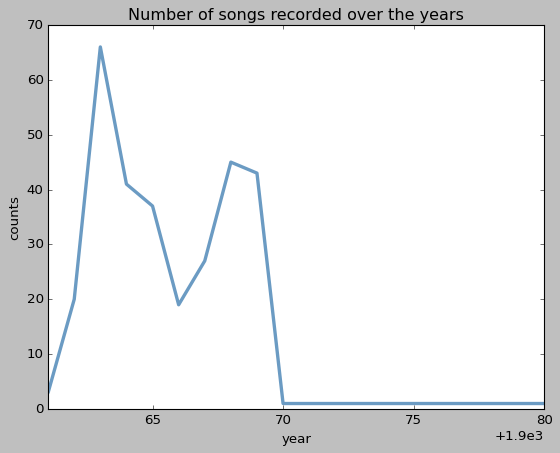

In [15]:
ax = plt.axes()

ax.set(xlim=(1961, 1980), ylim=(0, 70),
       xlabel='year', ylabel='counts',
       title='Number of songs recorded over the years')

# ax.plot(years_1962_1970, avg_duration);
ax.plot(year, counts, color='steelblue', linewidth=3, alpha=0.8);    # alpha: transparency (0-1)

Plot 2 versions of the diagram in 2 subplots (after [this](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)).

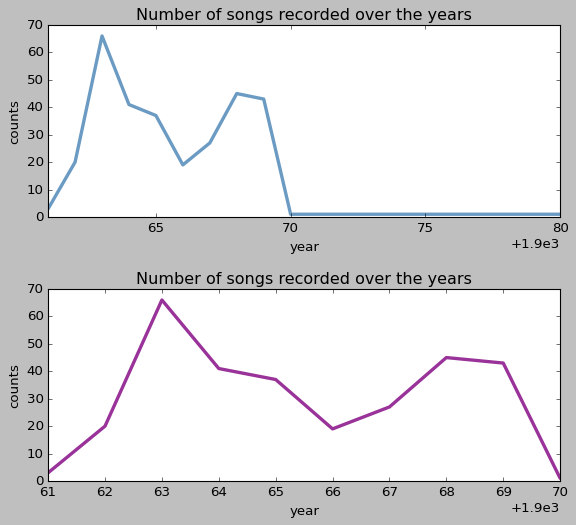

In [19]:
# # From https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
# fig = plt.figure()
# ax1 = fig.add_axes([0.1, 0.55, 0.8, 0.4],
#                    xticklabels=[], ylim=(-1.2, 1.2))
# ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
#                    ylim=(-1.2, 1.2))
# # Meanings of the numbers in [0.1, 0.55, 0.8, 0.4]:
# #     0.1 - distance from the left edge of fig (grey area)
# #     0.55 - distance between the upper and lower subplots (0.5: they touch each other)
# #     0.8 - distance from the right edge of fig (grey area)
# #     0.4 - area assigned to the upper/lower subplot (ax1/ax2) along the vertical axes
# # Experiment with these numbers to get a better feeling for them
#
# x = np.linspace(0, 10)
# ax1.plot(np.sin(x))
# ax2.plot(np.cos(x));


# fig, ax = plt.subplots()
# ax

fig = plt.figure()
# fig
ax1 = fig.add_axes([0.1, 0.65, 0.8, 0.4],
                   xlim=(1961, 1980), ylim=(0, 70),
                   xlabel='year', ylabel='counts',
                   title='Number of songs recorded over the years')
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   xlim=(1961, 1970), ylim=(0, 70),
                   xlabel='year', ylabel='counts',
                   title='Number of songs recorded over the years')
# display(type(ax1))

ax1.plot(year, counts, color='steelblue', linewidth=3, alpha=0.8)    # alpha: transparency (0-1)
ax2.plot(year, counts, color='purple', linewidth=3, alpha=0.8);    # alpha: transparency (0-1)

Smoothen the curves. Based on [this](https://stackoverflow.com/a/5284038/1899061).

`from scipy.interpolate import make_interp_spline, BSpline`

`<x> = <definition of x-axis variable>`
`<y> = <definition of y-axis variable>`

`<x_smooth> = np.linspace(<x>.min(), <x>max(), 300)`&emsp;&emsp;&emsp;&emsp;# 300: the number of points to make between `<x>.min() and <x>.max()`
`spl = make_interp_spline(year, counts, k=3)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; # type: BSpline
`<y_smooth> = spl(<x>_smooth)`

`plt.xlim([<lowest value of x to show on the plot>, <highest value of x to show on the plot>])`
`plt.ylim([<lowest value of y to show on the plot>, <highest value of x to show on the plot>])`

`plt.plot(<x_smooth>, <y_smooth>)`
`plt.plot(<x>, <y>)`&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;# optional: show the segmented line on the same plot as well
`plt.show()`



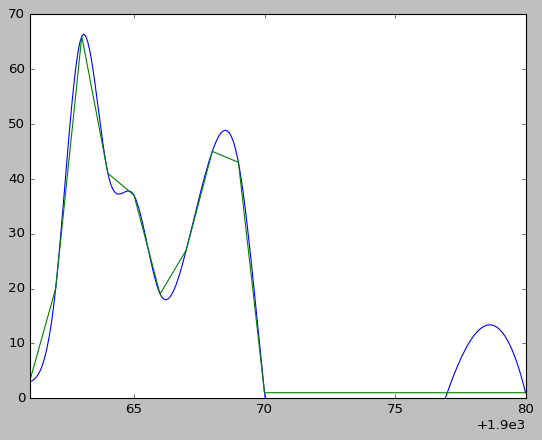

In [28]:
# # 300 represents the number of points to make between T.min and T.max
# T = np.array([6, 7, 8, 9, 10, 11, 12])
# power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])
#
# # plt.plot(T,power)
# # plt.show()
#
# xnew = np.linspace(T.min(), T.max(), 300)
#
# spl = make_interp_spline(T, power, k=3)  # type: BSpline
# power_smooth = spl(xnew)
#
# plt.plot(xnew, power_smooth)
# plt.show()

from scipy.interpolate import make_interp_spline, BSpline

year_smooth = np.linspace(year.min(), year.max(), 300)
spl = make_interp_spline(year, counts, k=3)  # type: BSpline
counts_smooth = spl(year_smooth)

plt.xlim([1961, 1980])
plt.ylim([0, 70])

plt.plot(year_smooth, counts_smooth)
plt.plot(year, counts)
plt.show()

# For some reasons, this did not work
# ax1.plot(year_smooth, counts_smooth, color='steelblue', linewidth=3, alpha=0.8)    # alpha: transparency (0-1)
# display(type(ax1.plot(year_smooth, counts_smooth, color='steelblue', linewidth=3, alpha=0.8)))    # alpha: transparency (0-1)
# # ax1.show()

##### Histogram

Use Pandas to extract song lengths as a NumPy array.

In [4]:
# Get the song lengths as a pd.Series object
lengths = songs['Duration']
print(lengths.head())

0    174
1    335
2    152
3    104
4    163
Name: Duration, dtype: int64


In [5]:
# Convert the song lengths into a NumPy array
times = lengths.values
print(type(times))
print(times.shape)

<class 'numpy.ndarray'>
(310,)


Plot the histogram of the song lengths using Matplotlib.

As for the plot styles, there are a lot of [available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) that can be also shown in code using `plt.style.available`. See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Alternatively, plot style can be set using `sb.set_theme()` (or just `sb.set()`, but that function might get deprecated and removed from *seaborn* in the future). See [`sb_set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults.

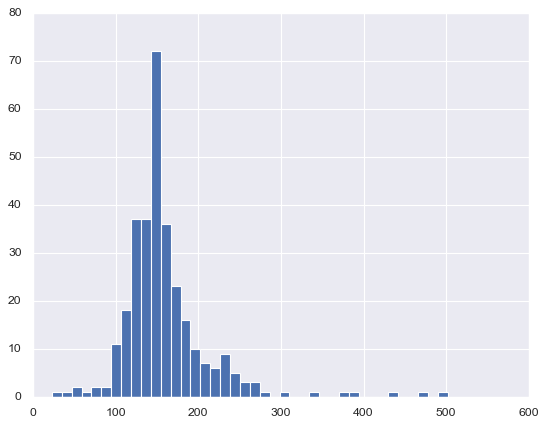

In [20]:
# Set plot style using sb.set_theme()
sb.set_theme()
# Plot the histogram - x: song time in [sec]; y: number of songs; 40 bins
plt.hist(times, 40);

Plot the histogram of the song lengths using *plotnine*.
[Excellent tutorial on plotnine](https://realpython.com/ggplot-python/).

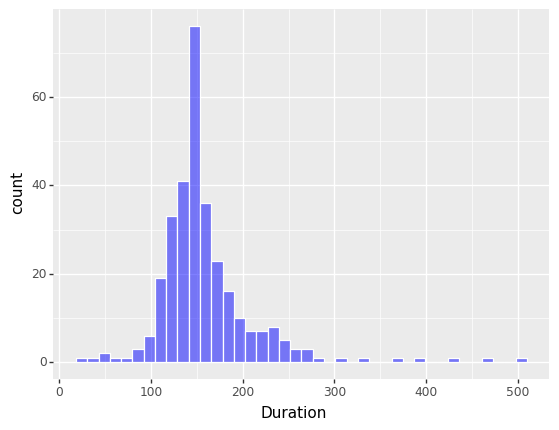

<ggplot: (149834009288)>

In [7]:
# plot = ggplot(songs, aes(x='Duration'))
# plot + geom_histogram(bins=40)
ggplot(songs, aes(x='Duration')) + \
    geom_histogram(bins=40,
                     fill='blue',
                     # color='black',
                     color='white',
                     # size=2,
                     alpha=0.5)

To avoid the annoying text output like `<ggplot: (177159008578)>` under the plot, use the following syntax:

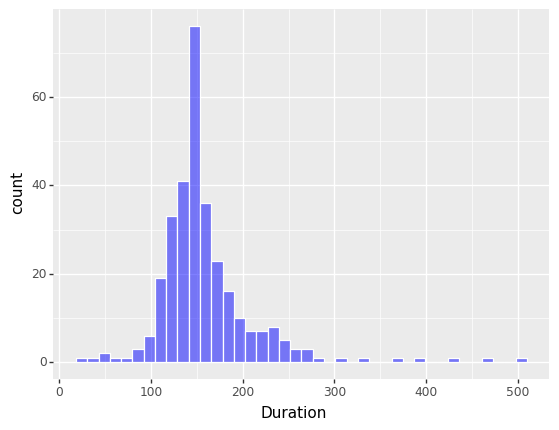

In [8]:
(
        ggplot(songs, aes(x='Duration')) + \
            geom_histogram(bins=40,
                          fill='blue',
                          # color='black',
                          color='white',
                          # size=2,
                          alpha=0.5)
).draw();

##### Scatterplot

Read a slightly different dataset.

In [31]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
display(songs)

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


Check for missing values.

<AxesSubplot:>

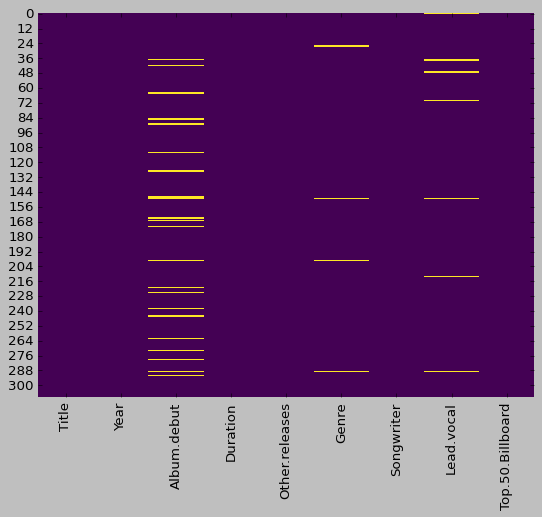

In [34]:
display(sb.heatmap(songs.isna(), cmap='viridis', cbar=False))

Scatterplot the relationship between `Duration` and `Other.releases`.

To set the ranges of values on x-axis and y-axis (`Duration`, `Other.releases`), check the max values.


In [39]:
display(songs['Duration'].max())
display(songs['Other.releases'].max())

502

56

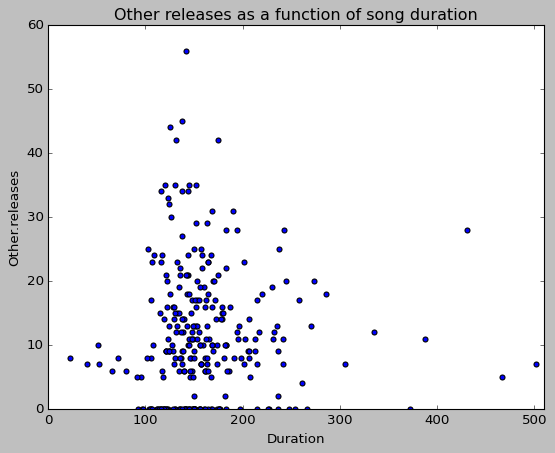

In [48]:
ax = plt.axes()

ax.set(xlim=(0, 510), ylim=(0, 60),
       xlabel='Duration', ylabel='Other.releases',
       title='Other releases as a function of song duration')

# The color parameter is optional; if present, it should be a sequence of length consistent with the lengths of <x> and <y> ((<x>, <y>) points)
ax.scatter(songs['Duration'], songs['Other.releases']);                                     # default color
# ax.scatter(songs['Duration'], songs['Other.releases'], color='steelblue');                  # set the color manually
# ax.scatter(songs['Duration'], songs['Other.releases'], color=('steelblue', 'red')*155);     # set the colors manually (a sequence of 2 colors)

What are the shortest/longest songs and their durations?

In [56]:
# display(songs['Duration'] <= 170)                                     # Boolean mask
# display(type(songs['Duration'] <= 170))                               # pd.Series
# display(songs[songs['Duration'] <= 70]['Title'])                      # select one column
# display(songs[songs['Duration'] >= 400]['Title'])                     # select one column
display(songs[songs['Duration'] <= 70][['Title', 'Duration']])        # select multiple columns
display(songs[songs['Duration'] >= 400][['Title', 'Duration']])       # select multiple columns

0      False
1      False
2       True
3       True
4       True
       ...  
305     True
306     True
307    False
308     True
309     True
Name: Duration, Length: 310, dtype: bool

pandas.core.series.Series

,Title,Duration
53,Dig It,51
94,Her Majesty,23
173,Maggie Mae,40
179,Mean Mr. Mustard,66
288,Wild Honey Pie,52


,Title,Duration
98,Hey Jude,431
120,I Want You (She's So Heavy),467
212,Revolution 9,502


##### Bar graph

How many Beatles songs have reached Billboard Top 50?

Read the dataset and make some minor transformations.

In [3]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
display(songs)

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


Add another column, `Top50`: a song has reached Billboard Top 50 chart (`Yes`), or it hasn't (`No`).

In [4]:
songs['Top50'] = 'No'
# i = songs.loc[songs['Top.50.Billboard'] != -1]
# display(len(i))
# i = songs.loc[songs['Top.50.Billboard'] != -1].index
i = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)
# display(i)
songs.loc[i, 'Top50'] = 'Yes'
display(songs['Top50'].sample(10))

109     No
22      No
53      No
62     Yes
127     No
129     No
255     No
87      No
28      No
291     No
Name: Top50, dtype: object

Check if the newly added `Top50` column is now OK.

In [5]:
display(len(songs.loc[i, 'Title']))
display(songs.loc[i, 'Title'])

49

2                   A Hard Day's Night
6                        Act Naturally
7                      Ain't She Sweet
12                All You Need Is Love
13                      And I Love Her
21             Baby, You're a Rich Man
34                   Can't Buy Me Love
45                       Come Together
49                         Day Tripper
55       Do You Want to Know a Secret?
62                   Eight Days a Week
63                       Eleanor Rigby
73                      Free as a Bird
76                            Get Back
86         Got to Get You into My Life
91                      Hello, Goodbye
92                               Help!
98                            Hey Jude
106    I Don't Want to Spoil the Party
107                        I Feel Fine
115           I Saw Her Standing There
118           I Want to Hold Your Hand
124                   I'll Cry Instead
156                       Lady Madonna
159                          Let It Be
166                      

###### Preparing the data for plotting the bar graph

Group the data.

In [6]:
songs_by_year = songs.groupby('Year')

Build the data to plot by extracting relevant items from each group.

In [7]:
years = songs['Year'].unique()                              # How many unique years are there in the dataset?
# display(years)
# display(type(years))                                      # numpy.ndarray
years_sorted = np.sort(years)
# display(years_sorted)

# y1964 = songs_by_year.get_group(1964)
# display(type(y1964))                                      # pd.DataFrame
#
# display(y1964['Top50'].value_counts())
# display(type(y1964['Top50'].value_counts()))              # pd.Series
# display(y1964['Top50'].value_counts()['Yes'])             # How many 1964 songs have reached Top 50?
# display(y1964['Top50'].value_counts()['No'])              # How many 1964 songs have NOT reached Top 50?

# y1958 = songs_by_year.get_group(1958)
# display(y1958['Top50'].value_counts())

in_top50 = []
not_in_top50 = []
for year in years_sorted:
    y = songs_by_year.get_group(year)
    in_top50.append(y['Top50'].value_counts()['Yes'] if any(y['Top50'] == 'Yes') else 0)
    not_in_top50.append(y['Top50'].value_counts()['No'] if any(y['Top50'] == 'No') else 0)
display(in_top50)
display(not_in_top50)

# display(y1964.value_counts())
# display(type(y1964.value_counts()))                       # pd.Series
# # display(songs['Year'].value_counts()[1964])


[0, 0, 2, 3, 6, 10, 7, 7, 3, 3, 6, 0, 1, 1]

[2, 4, 1, 17, 60, 31, 30, 12, 24, 42, 37, 1, 0, 0]

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

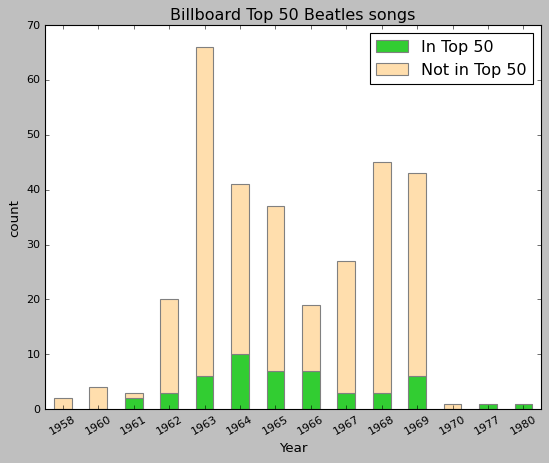

In [32]:
# # The role-model example from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
# speed = [0.1, 17.5, 40, 48, 52, 69, 88]
# lifespan = [2, 8, 70, 1.5, 25, 12, 28]
# index = ['snail', 'pig', 'elephant', 'rabbit', 'giraffe', 'coyote', 'horse']
# df = pd.DataFrame({'speed': speed, 'lifespan': lifespan}, index=index)
# ax = df.plot.bar(rot=0)

df = pd.DataFrame({'In Top 50': in_top50, 'Not in Top 50': not_in_top50},
                  index=years_sorted)
# # ax = df.plot.bar(rot=0)                         # the returned value is of type matplotlib.axes.Axes
# df.plot.bar(rot=0)                                # however, the returned value is usually unnecessary
ax = df.plot.bar(rot=30,
                 ylim=(0, 70),
                 color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'},
                 edgecolor='grey',
                 title='Billboard Top 50 Beatles songs',
                 xlabel='Year',
                 ylabel='count',
                 fontsize=10,
                 stacked=True)

##### Box plot
Based on [this](https://seaborn.pydata.org/generated/seaborn.boxplot.html).
For Seaborn color palette names see [this](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette) or [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/). To list the names of some ('quantitative') Seaborn color palettes, use `sns.palettes.SEABORN_PALETTES.keys()` (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/) and [this](https://www.codecademy.com/article/seaborn-design-ii) for additional named palettes).

In [96]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
display(songs)

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


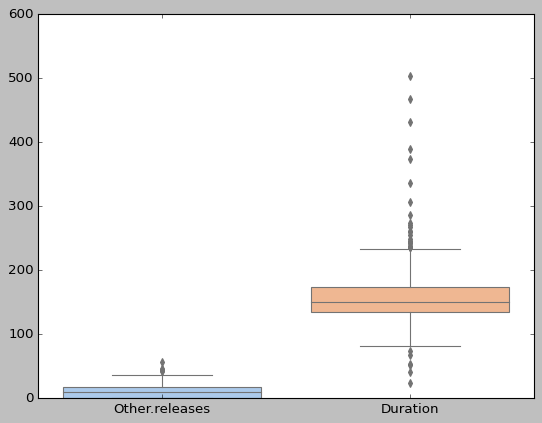

In [118]:
# display(sb.palettes.SEABORN_PALETTES.keys())

# # For a single column (y-axis represents density of counts)
# # sb.boxplot(x=songs['Duration']);
# sb.boxplot(y=songs['Duration'], palette='Set3');

# For multiple columns
sb.boxplot(data=songs[['Other.releases', 'Duration']], orient='v', palette='pastel');

##### Violin plot
Combines box plot and density plot. Based on [this](https://stackoverflow.com/questions/46134113/seaborn-violin-plot-from-pandas-dataframe-each-column-its-own-separate-violin-p) and [this](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

In [4]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
display(songs)

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


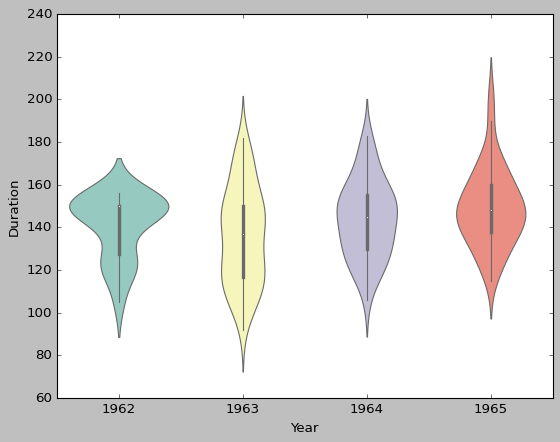

In [121]:
# # Just testing
# # s = songs.loc[1968 <= songs['Year'], 'Title']
# # display(len(s))
# # display(s.head(10))
#
# i = (1962 <= songs['Year']) & (songs['Year'] <= 1965)
# display(len(i))
# display(songs[i]['Title'])
# # # Alternatively
# # display(songs.loc[i, 'Title'])

# sb.violinplot(x=songs['Other.releases'], y=songs['Duration'], data=songs);
# sb.violinplot(x=songs['Year'], y=songs['Duration'], data=songs);
# sb.violinplot(x='Year', y='Duration', data=songs);
# sb.violinplot(x='Year', y='Duration', data=songs);

# # For a single column (y-axis represents density of counts)
# sb.violinplot(x=songs['Year']);

sb.violinplot(x=songs[(1962 <= songs['Year']) & (songs['Year'] <= 1965)]['Year'],
              y=songs['Duration'],
              data=songs,
              palette='Set3');
# # Alternatively
# i = (1962 <= songs['Year']) & (songs['Year'] <= 1965)
# sb.violinplot(x=songs.loc[i, 'Year'],                       # or x=songs.loc[i]['Year']
#               y=songs['Duration'],
#               data=songs,
#               palette='pastel');

##### Heat map
Based on [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [46]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
display(songs)

,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
0,12-Bar Original,1965,Anthology 2,174,0,Blues,"Lennon, McCartney, Harrison and Starkey",NaN,-1
1,A Day in the Life,1967,Sgt. Pepper's Lonely Hearts Club Band,335,12,"Psychedelic Rock, Art Rock, Pop/Rock",Lennon and McCartney,Lennon and McCartney,-1
2,A Hard Day's Night,1964,UK: A Hard Day's Night US: 1962-1966,152,35,"Rock, Electronic, Pop/Rock",Lennon,"Lennon, with McCartney",8
3,A Shot of Rhythm and Blues,1963,Live at the BBC,104,0,"R&B, Pop/Rock",Thompson,Lennon,-1
4,A Taste of Honey,1963,UK: Please Please Me US: The Early Beatles,163,29,"Pop/Rock, Jazz, Stage&Screen","Scott, Marlow",McCartney,-1
...,...,...,...,...,...,...,...,...,...
305,You're Going to Lose That Girl,1965,Help!,140,6,"Rock, Pop/Rock",Lennon,Lennon,-1
306,You've Got to Hide Your Love Away,1965,Help!,131,12,FolkPop/Rock,Lennon,Lennon,-1
307,You've Really Got a Hold on Me,1963,UK: With the Beatles US: The Beatles Second Album,182,2,"Soul, Pop/Rock",Robinson,Lennon and Harrison,-1
308,Young Blood,1963,Live at the BBC,116,0,Pop/Rock,"Leiber, Stoller",Harrison,-1


Add another column, `Top50`: a song has reached Billboard Top 50 chart (`Yes`), or it hasn't (`No`).

In [47]:
songs['Top50'] = 'No'
# i = songs.loc[songs['Top.50.Billboard'] != -1]
# display(len(i))
# i = songs.loc[songs['Top.50.Billboard'] != -1].index
i = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)
# display(i)
songs.loc[i, 'Top50'] = 'Yes'
display(songs['Top50'].sample(10))

111     No
177    Yes
167     No
218     No
151     No
288     No
183     No
90      No
221     No
268     No
Name: Top50, dtype: object

Categorize songs according to the number of other releases.

In [48]:
songs['Other.releases.category'] = 'Medium'
display(songs['Other.releases'].max())

very_low = songs['Other.releases'] < 10
# display(very_low.sample(20))
low = (songs['Other.releases'] >= 10) & (songs['Other.releases'] < 20)
# display(songs[low].sample(10))
high = (songs['Other.releases'] >= 30) & (songs['Other.releases'] < 40)
very_high = songs['Other.releases'] >= 40

songs.loc[very_low, 'Other.releases.category'] = 'Very Low'
songs.loc[low, 'Other.releases.category'] = 'Low'
songs.loc[high, 'Other.releases.category'] = 'High'
songs.loc[very_high, 'Other.releases.category'] = 'Very High'
# display(songs[very_high][['Title', 'Other.releases.category']])

56

Create a suitable pivot table and plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).

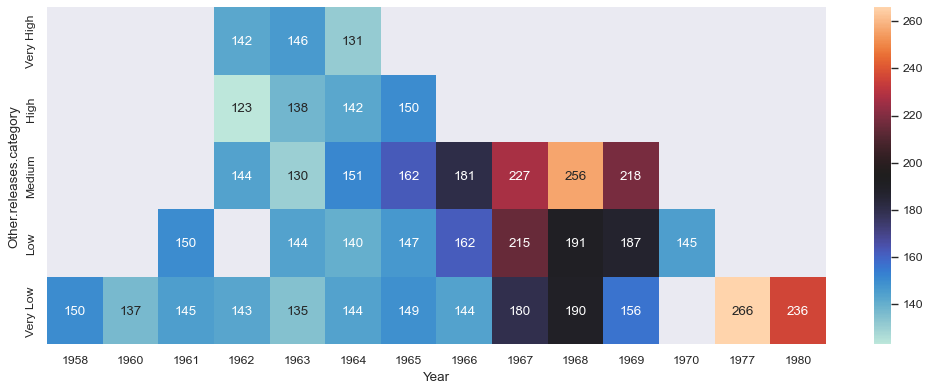

In [71]:
# # The example from https://pythonbasics.org/seaborn-heatmap/
# np.random.seed(0)
# sb.set()
# uniform_data = np.random.rand(10, 12)
# display(uniform_data)
# ax = sb.heatmap(uniform_data, vmin=0, vmax=1)
# plt.show()

# # The first example from https://seaborn.pydata.org/generated/seaborn.heatmap.html
# glue = sb.load_dataset("glue")
# display(glue)
# glue = sb.load_dataset("glue").pivot("Model", "Task", "Score")
# glue

# glue = sb.load_dataset("glue").pivot("Model", "Task", "Score")
# sb.heatmap(glue);

# s = songs.pivot_table('Duration', index='Top50', columns='Year')
# sb.heatmap(s);

# Without the following rearrangement of categories, they are shown on the heatmap in alphabetical order (which is typically not very natural)
songs['Other.releases.category'] = pd.Categorical(songs['Other.releases.category'],
                                                  categories=['Very High', 'High', 'Medium', 'Low', 'Very Low'],
                                                  ordered=True)

s = songs.pivot_table('Duration', index='Other.releases.category', columns='Year')

# s = songs.pivot_table('Duration', index=['Very Low', 'Low', 'Medium', 'High', 'Very High'], columns='Year')
sb.set_theme(rc={'figure.figsize': (15.7,5.27)})      # set the size of the figure to avoid cluttering
sb.heatmap(s,
           annot=True,          # annotate heatmap cells with values
           fmt='.0f',           # use int values in annotations, not scientific notation ('g' for using mixed int and float annotations)
           cmap='icefire');     # color map (see https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)

##### A fancier example
Average duration of songs over the years, represented as circles with sizes proportional to the numbers of songs. Based on

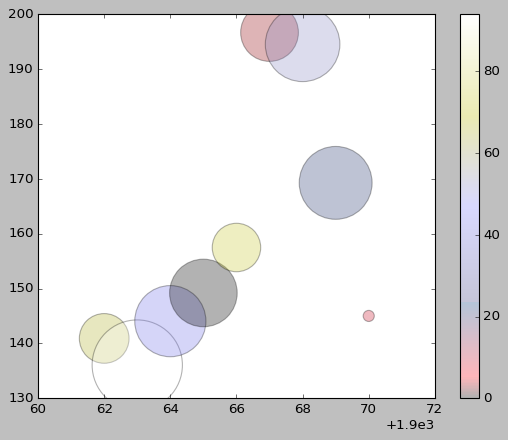

In [22]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
songs_by_year = songs.groupby('Year')
years_1962_1970 = np.array(range(1962, 1971))

avg_duration = []
for year in years_1962_1970:
    avg_duration.append(np.mean(songs_by_year.get_group(year)['Duration']))
avg_duration = np.array(avg_duration)

rng = np.random.RandomState(370)

colors = rng.choice(100, size=len(years_1962_1970), replace=False)            # random sample, no duplicates
# display(colors)

sizes = []
for year in years_1962_1970:
    sizes.append(len(songs_by_year.get_group(year)) * 100)                    # sizes proportional to the numbers of songs

plt.scatter(years_1962_1970, avg_duration,
            c=colors, s=sizes, alpha=0.3,                                     # alpha: the level of transparency
            cmap='gist_stern')                                                # cmap: a pre-defined color map
plt.colorbar();                                                               # show color scale

In [10]:
top50_index = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)            # the songs in Top 50
# display(top50_index)
not_top50_index = np.array(songs.loc[songs['Top.50.Billboard'] == -1].index)        # the songs not in Top 50
# display(not_top50_index)

array([  2,   6,   7,  12,  13,  21,  34,  45,  49,  55,  62,  63,  73,
        76,  86,  91,  92,  98, 106, 107, 115, 118, 124, 156, 159, 166,
       177, 187, 193, 202, 203, 204, 207, 209, 210, 213, 227, 229, 233,
       237, 240, 250, 254, 260, 270, 276, 280, 294, 297], dtype=int64)

array([  0,   1,   3,   4,   5,   8,   9,  10,  11,  14,  15,  16,  17,
        18,  19,  20,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
        32,  33,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  46,
        47,  48,  50,  51,  52,  53,  54,  56,  57,  58,  59,  60,  61,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  74,  75,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  87,  88,  89,  90,  93,  94,
        95,  96,  97,  99, 100, 101, 102, 103, 104, 105, 108, 109, 110,
       111, 112, 113, 114, 116, 117, 119, 120, 121, 122, 123, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 157, 158, 160, 161, 162, 163, 164, 165, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 197,
       198, 199, 200, 201, 205, 206, 208, 211, 212, 214, 215, 21

And now plot it.

## Masking - Boolean arrays as masks

A simple example.

In [45]:
a = pd.Series([1, 2, 3])
mask = [True, False, True]
display(a[mask])

0    1
2    3
dtype: int64

Extract song release years into another NumPy array.

In [42]:
# print(type(songs['Year']))          # <class 'pandas.core.series.Series'>
years = songs['Year'].values
# print(type(years))                  # <class 'numpy.ndarray'>
display(len(years))
display(years[0:10])

310

array([1965, 1967, 1964, 1963, 1963, 1968, 1965, 1961, 1963, 1963],
      dtype=int64)

Extract songs released after 1968.

In [54]:
years_gt_1968 = years > 1968                          # mask: Boolean array of the same length as years, True if years > 1968
display(years_gt_1968[20:30])                              # get a slice of it

array([False, False, False, False, False, False,  True,  True, False,
       False])

Get the titles of the first 10 songs released after 1968.

In [47]:
# Get the titles of the first 10 songs such that years > 1968
display(songs[years_gt_1968]['Title'].head(10))

10             All Things Must Pass
26    Because I Know You Love Me So
27                          Because
36                Carry That Weight
44                  Come and Get It
45                    Come Together
52                       Dig a Pony
53                           Dig It
59                Don't Let Me Down
68        Fancy My Chances with You
Name: Title, dtype: object

Get the titles of the last 10 songs such that `years > 1968` and `times < 120`.

In [55]:
# Get the titles of the last 10 songs such that years > 1968 and times < 120
lengths = songs['Duration']
times = lengths.values                                                      # convert the song lengths into a NumPy array
times_lt_120 = times < 120
display(songs[years_gt_1968 & times_lt_120]['Title'].tail(10))

36                           Carry That Weight
53                                      Dig It
81                             Golden Slumbers
94                                 Her Majesty
173                                 Maggie Mae
175            Mailman, Bring Me No More Blues
179                           Mean Mr. Mustard
208                              Polythene Pam
226    She Came in Through the Bathroom Window
Name: Title, dtype: object

In [49]:
# Get the titles of all songs released 1966 or 1967, as well as the mean value of their lengths
years_1966_1967 = (years >= 1966) & (years <= 1967)
display(songs[years_1966_1967]['Title'])
display('Mean length of songs from 1966-1967:', np.mean(songs[years_1966_1967]['Duration']))

1                                    A Day in the Life
11                                    All Together Now
12                                All You Need Is Love
14                              And Your Bird Can Sing
21                             Baby, You're a Rich Man
28                  Being for the Benefit of Mr. Kite!
31                                        Blue Jay Way
41                      Christmas Time (Is Here Again)
56                                       Doctor Robert
63                                       Eleanor Rigby
69                                       Fixing a Hole
70                                              Flying
71                                          For No One
77                                      Getting Better
82                                   Good Day Sunshine
83                          Good Morning, Good Morning
86                         Got to Get You into My Life
91                                      Hello, Goodbye
96        

'Mean length of songs from 1966-1967:'

180.47826086956522

## Fancy indexing
Fancy indexing is like simple indexing, but arrays of indices are passed in place of single scalars. <br>
**Important:** The shape of the result is the same as the (possibly broadcasted) shape of the index array, not of the array being indexed.

### Fancy indexing of one-dimensional arrays

In [50]:
np.random.seed(3)
a = np.random.randint(10, size=10)
display(a)

i = [2, 8, 5]                                 # one-dimensional index
display(a[i])
a[i] = 55
display(a)
a[i] -= 10
display(a)

i = np.array([[1, 0],                         # multi-dimensional index
              [2, 4]])
display(a[i])                                   # the shape of the result is the same as the shape of the index array

array([8, 9, 3, 8, 8, 0, 5, 3, 9, 9])

array([3, 9, 0])

array([ 8,  9, 55,  8,  8, 55,  5,  3, 55,  9])

array([ 8,  9, 45,  8,  8, 45,  5,  3, 45,  9])

array([[ 9,  8],
       [45,  8]])

### Fancy indexing of multi-dimensional arrays

In [23]:
m = np.random.randint(10, size=(3, 4))
display(m)

i_row = np.array([0, 2, 1])
i_col = np.array([2, 1, 0])
display(m[i_row, i_col])                        # resulting pairs of indices: [0, 2], [2, 1], [1, 0]

display(m[i_row[:, np.newaxis], i_col])

display(m[2, [2, 0, 1]])
display(m[-2:, [2, 0, 1]])

array([[5, 7, 6, 0],
       [4, 7, 8, 1],
       [6, 2, 2, 1]])

array([6, 2, 4])

array([[6, 7, 5],
       [2, 2, 6],
       [8, 7, 4]])

array([2, 6, 2])

array([[8, 4, 7],
       [2, 6, 2]])

## Sorting arrays
What are the longest and the shortest Beatles songs?

In [24]:
a = np.array([3, 1, 7, 2, 5])
display(a)
display(np.sort(a))                # a does not change
a.sort()                           # inplace sorting, a changes
display(a)

array([3, 1, 7, 2, 5])

array([1, 2, 3, 5, 7])

array([1, 2, 3, 5, 7])

In [25]:
np.random.seed(0)
m = np.random.randint(10, size=(4, 6))
display(m)

display(np.sort(m, axis=0))                 # sort each column of x, independently
display(np.sort(m, axis=1))                 # sort each row of x, independently

array([[5, 0, 3, 3, 7, 9],
       [3, 5, 2, 4, 7, 6],
       [8, 8, 1, 6, 7, 7],
       [8, 1, 5, 9, 8, 9]])

array([[3, 0, 1, 3, 7, 6],
       [5, 1, 2, 4, 7, 7],
       [8, 5, 3, 6, 7, 9],
       [8, 8, 5, 9, 8, 9]])

array([[0, 3, 3, 5, 7, 9],
       [2, 3, 4, 5, 6, 7],
       [1, 6, 7, 7, 8, 8],
       [1, 5, 8, 8, 9, 9]])

`np.argsort()`
Returns the indices that would sort an array.

In [26]:
songs = pd.read_csv('data/The Beatles songs dataset, v1, no NAs.csv')       # get the songs as a pd.DataFrame object
lengths = songs['Duration']                                                 # get the song lengths as a pd.Series object
display(lengths.head())

times = lengths.values                                                      # convert the song lengths into a NumPy array
i = np.argsort(times)                                                       # sort song times from shortest to longest
display(type(i))                                                              # <class 'numpy.ndarray'>
display(i[0:10])                                                              # print the first 10 indices
display(times[i[0:10]])                                                       # print the 10 shortest song times

display(songs['Title'][i])                                                    # fancy-index songs['Title']

display(songs['Title'][i[-10:]])                                              # fancy-index songs['Title'], the 10 longest songs

0    174
1    335
2    152
3    104
4    163
Name: Duration, dtype: int64

numpy.ndarray

array([ 94, 173,  53, 288, 179, 208, 223,  81, 132,  36], dtype=int64)

array([23, 40, 51, 52, 66, 72, 80, 91, 92, 96], dtype=int64)

94                     Her Majesty
173                     Maggie Mae
53                          Dig It
288                 Wild Honey Pie
179               Mean Mr. Mustard
                  ...             
283       What's The New Mary Jane
146              It's All Too Much
98                        Hey Jude
120    I Want You (She's So Heavy)
212                   Revolution 9
Name: Title, Length: 310, dtype: object

93                   Helter Skelter
104                 I Am the Walrus
286    While My Guitar Gently Weeps
291          Within You Without You
1                 A Day in the Life
283        What's The New Mary Jane
146               It's All Too Much
98                         Hey Jude
120     I Want You (She's So Heavy)
212                    Revolution 9
Name: Title, dtype: object

##### Bargraph

Read the dataset and add the `Top50` column

In [ ]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
songs_by_year = songs.groupby('Year')

Add another column, `Top50`: a song has reached Billboard Top 50 chart (`Yes`), or it hasn't (`No`).

In [3]:
songs['Top50'] = 'No'
i = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)
songs.loc[i, 'Top50'] = 'Yes'